STAT 479: Deep Learning (Spring 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-ss2019/  
GitHub repository: https://github.com/rasbt/stat479-deep-learning-ss19

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy

Author: Sebastian Raschka

Python implementation: CPython
Python version       : 3.12.6
IPython version      : 8.31.0

numpy: 2.2.2



# L03: Perceptrons

Implementation of the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels).

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing a toy dataset

In [4]:
##########################
### DATASET
##########################

# load the dataset to numpy
data = np.genfromtxt('../data/perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]  # X is matrix and y is class labeled array
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])  # create indexes from 0 to 99
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]   # X and y is shuffled based on random order of shuffle_idx

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
# Recommended to improve the performance of the machine learning models
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


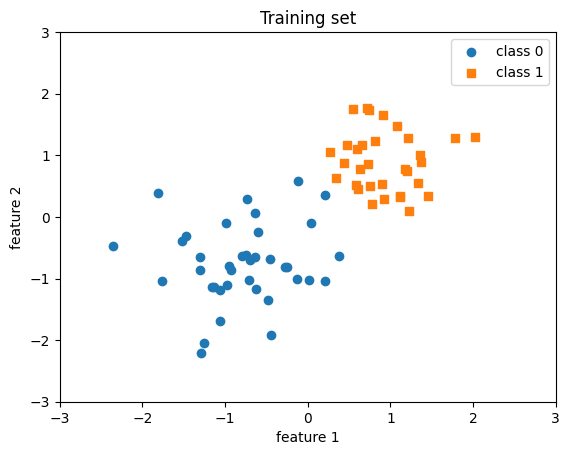

In [6]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

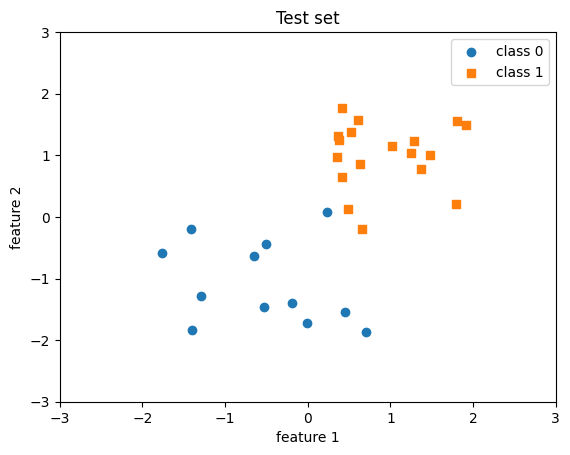

In [7]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Defining the Perceptron model

In [10]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
		# a column vector of weights initialized to zero. Will be updated during training to define the decision boundary
        self.weights = np.zeros((num_features, 1), dtype=float)
		# a scalar initialized to zero, that acts as an offset for the decision boundary. helps shift the decision boundary without depending solely on the input features
        self.bias = np.zeros(1, dtype=float)

    def forward(self, x):
        """
        Represents the forward pass of the perceptron.
        :param x:
        :return:
        """
        linear = np.dot(x, self.weights) + self.bias    # computing weighted sum
        predictions = np.where(linear > 0., 1, 0)       # threshold
        return predictions
        
    def backward(self, x, y):
        """
        Computes the errors
        Used to determine the updates necessary for the weights and bias
        :param x:
        :param y:
        :return:
        """
        predictions = self.forward(x)
		# difference between true class labels and predictions
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
		# total number of matched labels / number of samples
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron

In [11]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]



In [14]:
training_acc = ppn.evaluate(X_train, y_train)
print('Training set accuracy: %.2f%%' % (training_acc*100))

Training set accuracy: 100.00%


## Evaluating the model

In [12]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


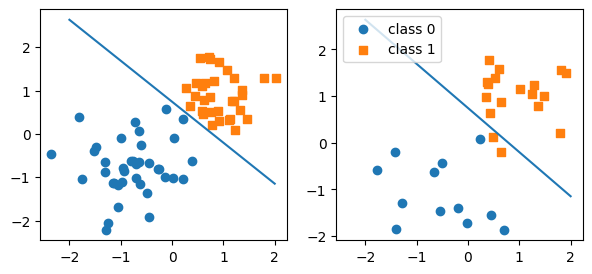

In [16]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

# plot the decision boundary
ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()